In [1]:
 # EDA -1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
df.duplicated().sum()

np.int64(6)

In [6]:
 df.drop_duplicates()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [10]:
data = df

In [11]:
df = pd.DataFrame(data)

In [12]:
# 1.  What is the range of selling prices in the dataset?

df = pd.DataFrame(data)

max_price = df['selling_price'].max()
min_price = df['selling_price'].min()
price_range = max_price - min_price

print(f"The range of selling prices is: {price_range}")


The range of selling prices is: 755000


In [13]:
# 2.  What is the median selling price for bikes in the dataset?

df = pd.DataFrame(data)

median_selling_price = df["selling_price"].median()
median_selling_price

print(f"The median selling price for bikes is: {median_selling_price}")

The median selling price for bikes is: 45000.0


In [14]:
# 3. What is the most common seller type?

df = pd.DataFrame(data)

most_common_seller = df['seller_type'].mode()[0]

print(f"The most common seller type is: {most_common_seller}")

The most common seller type is: Individual


In [15]:
# 4. How many bikes have driven more than 50,000 kilometers?

df = pd.DataFrame(data)

high_mileage_bikes_count = (df["km_driven"] > 50000).sum()
high_mileage_bikes_count


np.int64(170)

In [16]:
# 5.  What is the average km_driven value for each ownership type?

df = pd.DataFrame(data)

average_km_driven = df.groupby('owner')['km_driven'].mean()

print(average_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [17]:
# 6. What proportion of bikes are from the year 2015 or older?

older_bikes = df[df["year"] <= 2015]

older_bikes_count = len(older_bikes)
total_bikes_count = len(df)
older_bikes_proportion = older_bikes_count / total_bikes_count

print("Number of bikes from 2015 or older:", older_bikes_count)
print("Total number of bikes:", total_bikes_count)
print(f"Proportion of bikes from 2015 or older: {older_bikes_proportion:.2%}")

Number of bikes from 2015 or older: 601
Total number of bikes: 1061
Proportion of bikes from 2015 or older: 56.64%


In [19]:
# 7.  What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
missing_values.to_dict()

{'name': 0,
 'selling_price': 0,
 'year': 0,
 'seller_type': 0,
 'owner': 0,
 'km_driven': 0,
 'ex_showroom_price': 435}

In [20]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

max_ex_showroom_price = df["ex_showroom_price"].max()
bike_with_max_price = df[df["ex_showroom_price"] == max_ex_showroom_price]["name"].values[0]

max_ex_showroom_price, bike_with_max_price


(1278000.0, 'Harley-Davidson Street Bob')

In [21]:
# 9. What is the total number of bikes listed by each seller type?

bikes_by_seller_type = df["seller_type"].value_counts()

bikes_by_seller_type.to_dict()


{'Individual': 1055, 'Dealer': 6}

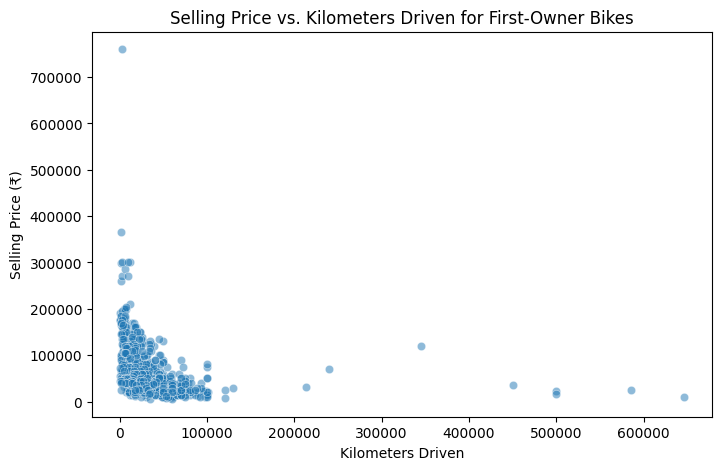

In [22]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df[df["owner"] == "1st owner"]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"], alpha=0.5)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (₹)")
plt.title("Selling Price vs. Kilometers Driven for First-Owner Bikes")
plt.show()


In [23]:
# 11. Identify and remove outliers in the km_driven column using the IQR method?


Q1 = first_owner_bikes["km_driven"].quantile(0.25)
Q3 = first_owner_bikes["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

first_owner_bikes_no_outliers = first_owner_bikes[
    (first_owner_bikes["km_driven"] >= lower_bound) & (first_owner_bikes["km_driven"] <= upper_bound)
]

outliers_removed = len(first_owner_bikes) - len(first_owner_bikes_no_outliers)
outliers_removed

35

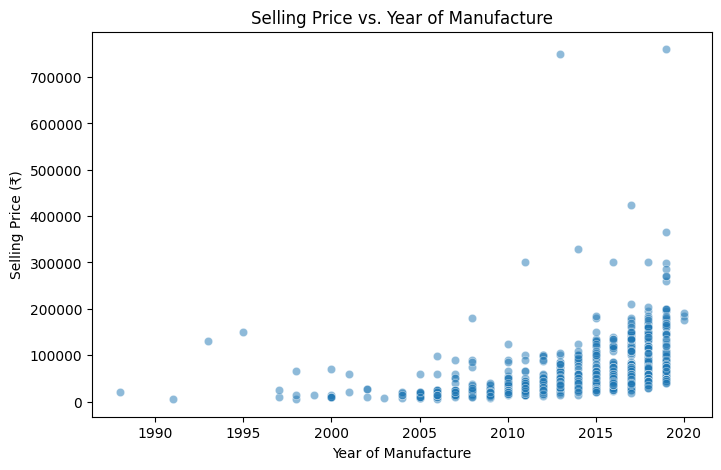

In [24]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year"], y=df["selling_price"], alpha=0.5)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.title("Selling Price vs. Year of Manufacture")
plt.show()


In [25]:
# 13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

current_year = 2025

df["bike_age"] = current_year - df["year"]

avg_depreciation_per_year = df.groupby("bike_age")["selling_price"].mean()

avg_depreciation_per_year.to_dict()


{5: 183333.33333333334,
 6: 119689.51162790698,
 7: 87660.37404580152,
 8: 78894.73684210527,
 9: 58469.01869158878,
 10: 56500.0,
 11: 48668.131868131866,
 12: 51136.98630136986,
 13: 35748.4,
 14: 35655.72131147541,
 15: 31793.333333333332,
 16: 22267.85714285714,
 17: 34289.28571428572,
 18: 24927.58620689655,
 19: 23380.0,
 20: 16978.571428571428,
 21: 15100.0,
 22: 8000.0,
 23: 20666.666666666668,
 24: 40000.0,
 25: 20833.333333333332,
 26: 15000.0,
 27: 28333.333333333332,
 28: 17500.0,
 30: 150000.0,
 32: 130000.0,
 34: 6000.0,
 37: 20000.0}

In [26]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

avg_price_by_year = df.groupby("year")["selling_price"].mean()

df["avg_price_for_year"] = df["year"].map(avg_price_by_year)

threshold = 1.5
expensive_bikes = df[df["selling_price"] > (df["avg_price_for_year"] * threshold)]

expensive_bikes[["name", "year", "selling_price", "avg_price_for_year"]]

,name,year,selling_price,avg_price_for_year
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
...,...,...,...,...
979,Royal Enfield Thunder 500,2015,105000,56500.000000
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868


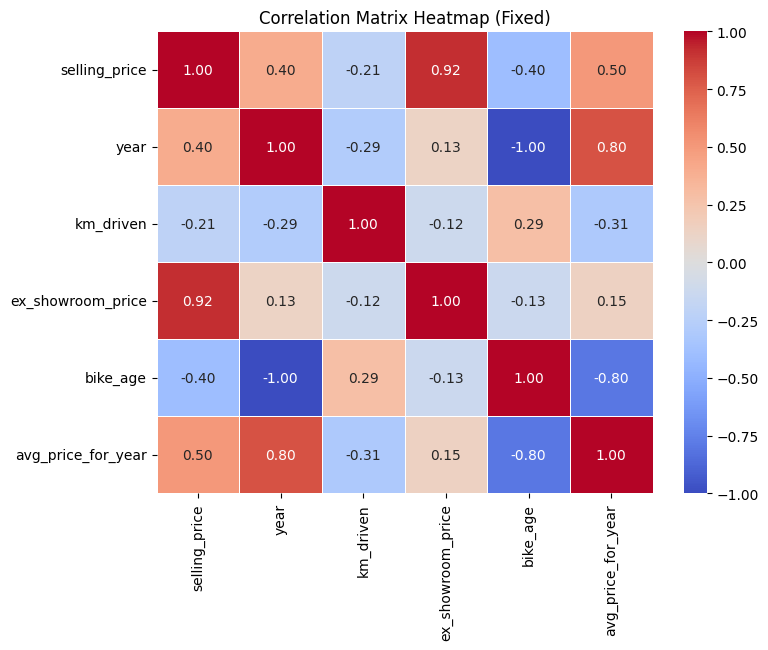

In [27]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?

numeric_df = df.select_dtypes(include=["number"])

correlation_matrix_fixed = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_fixed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Fixed)")
plt.show()


In [ ]:
# EDA - 2

In [28]:
df = pd.read_csv("/content/Car Sale.csv")

In [29]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [30]:
# 1. What is the average selling price of cars for each dealer, and
#    how does it compare across different dealers?

average_prices = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

print(average_prices)

sorted_avg_prices = average_prices.sort_values(by='Price ($)', ascending=False)
print(sorted_avg_prices)


                                        Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Motor Vehicle Branch Office  27956.739617
14        

Brands with the highest price variation:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


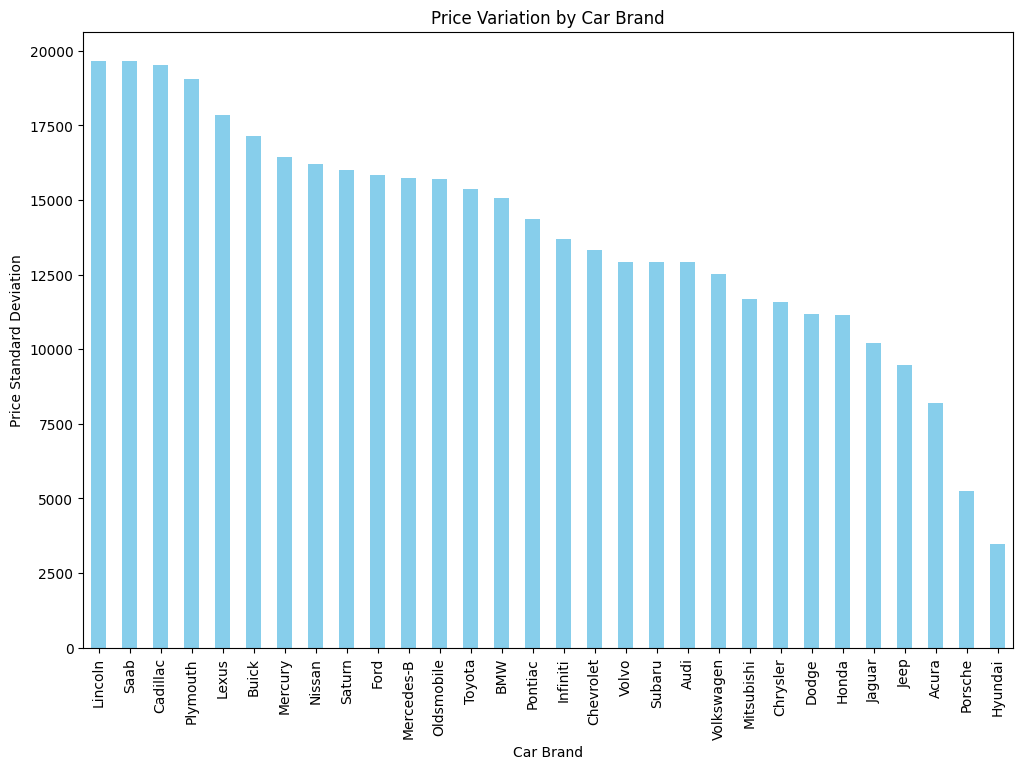

In [31]:
# 2.  Which car brand (Company) has the highest variation in prices, and
#     what does this tell us about the pricing trends?



# Calculate the price variation (standard deviation) for each brand
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print("Brands with the highest price variation:")
print(price_variation)

plt.figure(figsize=(12, 8))
price_variation.plot(kind='bar', color='skyblue')
plt.title('Price Variation by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation')
plt.show()

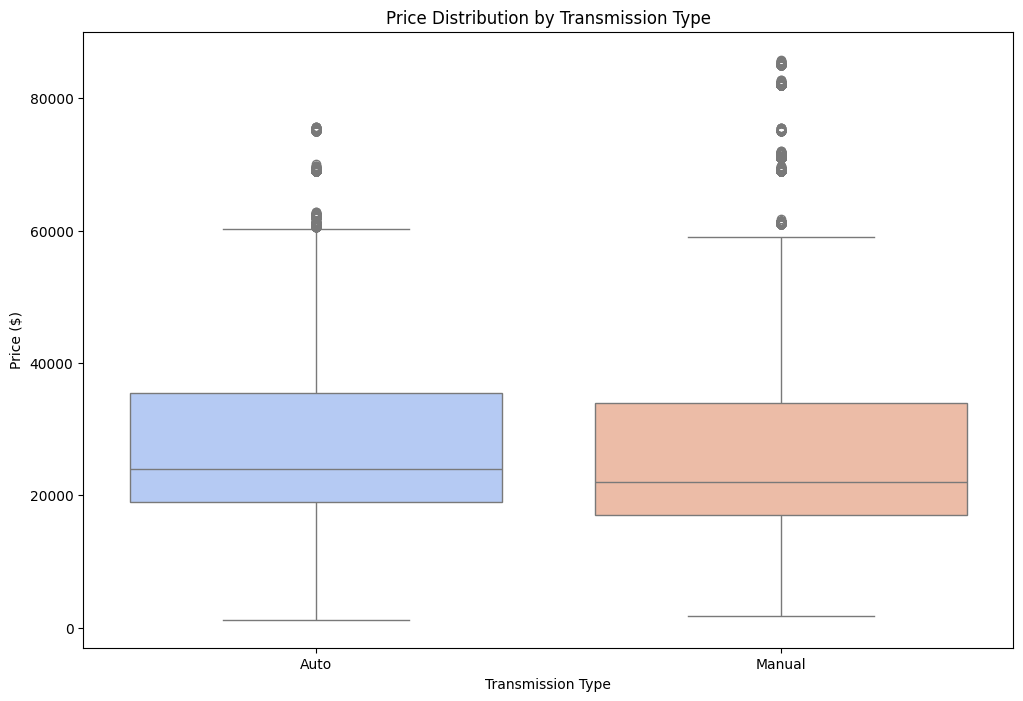

Interquartile Range (IQR) for Each Transmission Type:
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [32]:
# 3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='coolwarm')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

iqr_data = df.groupby('Transmission')['Price ($)'].describe().loc[:, ['25%', '75%']]
iqr_data['IQR'] = iqr_data['75%'] - iqr_data['25%']

print("Interquartile Range (IQR) for Each Transmission Type:")
print(iqr_data[['IQR']])


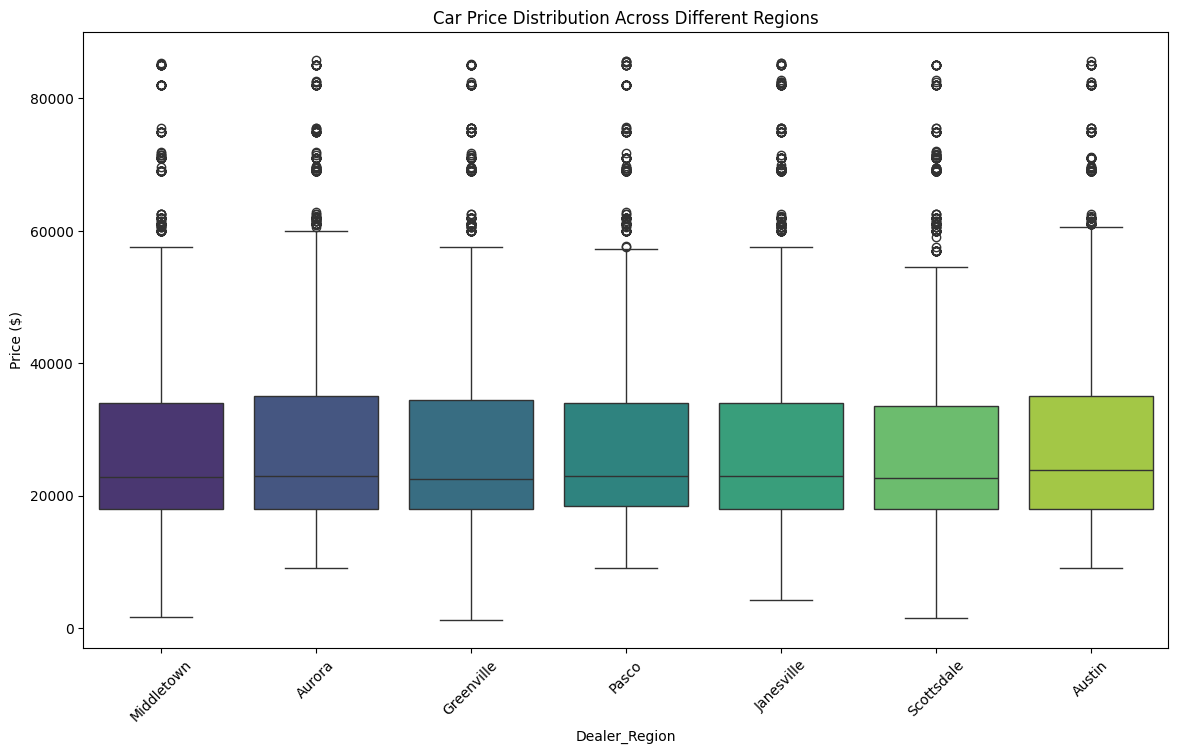

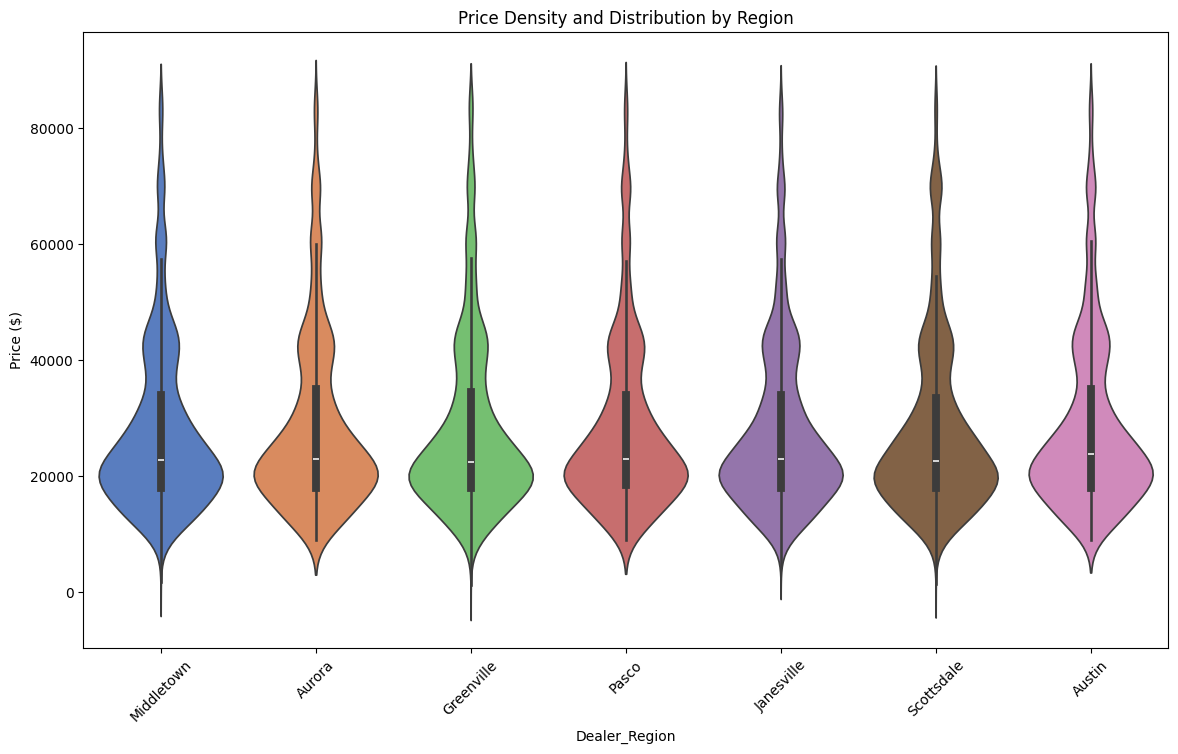

Summary Statistics for Each Region:
                count          mean      50%     min      max
Dealer_Region                                                
Aurora         3130.0  28334.626837  23000.0  9000.0  85800.0
Austin         4135.0  28341.603628  23801.0  9000.0  85601.0
Greenville     3128.0  28180.819054  22500.0  1200.0  85200.0
Janesville     3821.0  27833.350955  23000.0  4300.0  85400.0
Middletown     3128.0  27856.338875  22750.0  1700.0  85300.0
Pasco          3131.0  28119.039923  23000.0  9000.0  85600.0
Scottsdale     3433.0  27954.958928  22600.0  1450.0  85001.0


In [33]:
# 4.  What is the distribution of car prices across different regions?

plt.figure(figsize=(14, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')
plt.title('Car Price Distribution Across Different Regions')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(x='Dealer_Region', y='Price ($)', data=df, palette='muted')
plt.title('Price Density and Distribution by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Summary Statistics for Each Region:")
print(region_stats[['count', 'mean', '50%', 'min', 'max']])


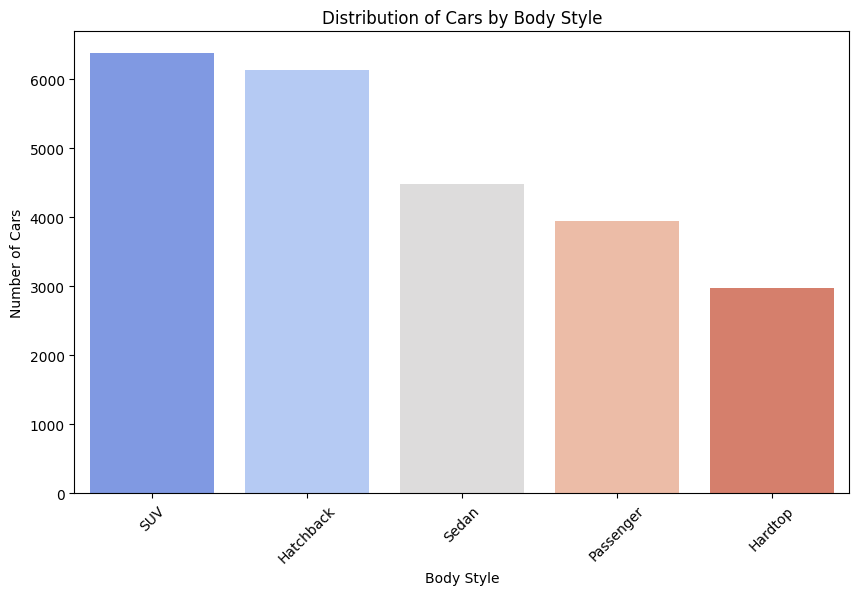

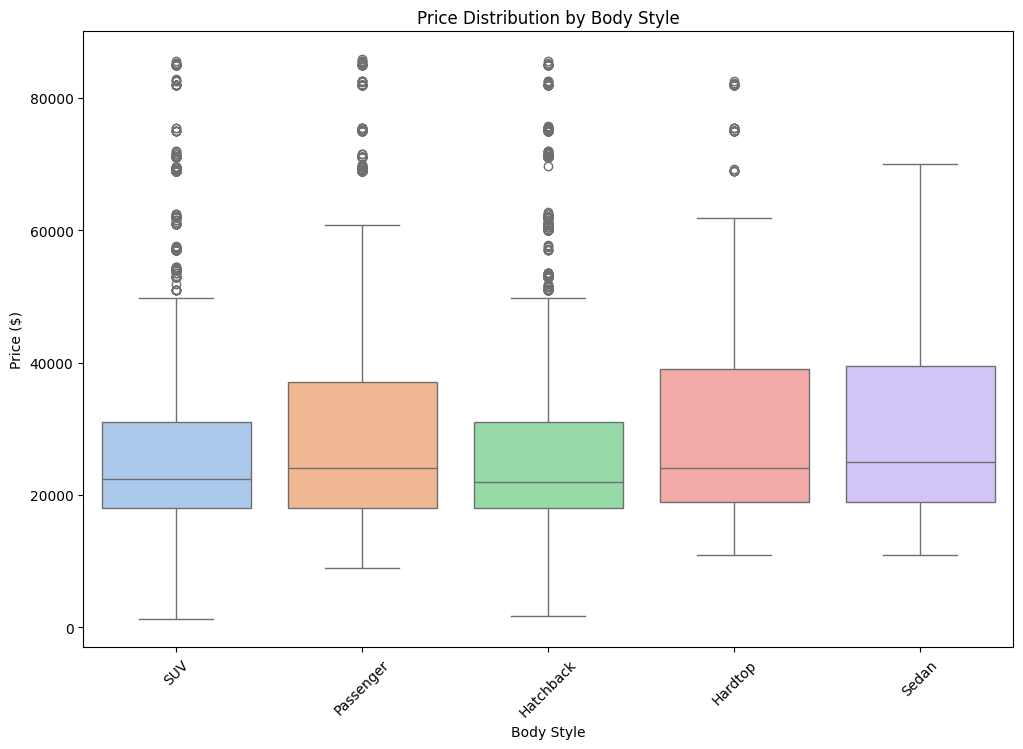

Summary Statistics for Each Body Style:
             count          mean      50%      min      max
Body Style                                                 
Hardtop     2971.0  29151.096600  24000.0  11000.0  82500.0
Hatchback   6128.0  27127.035574  22000.0   1700.0  85600.0
Passenger   3945.0  28942.031686  24000.0   9000.0  85800.0
SUV         6374.0  26767.673204  22350.0   1200.0  85500.0
Sedan       4488.0  29832.802807  25000.0  11000.0  69980.0


In [34]:
# 5. What is the distribution of cars based on body styles? Bar plot for car distribution by body style.

plt.figure(figsize=(10, 6))
body_style_counts = df['Body Style'].value_counts()
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='coolwarm')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', data=df, palette='pastel')
plt.title('Price Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

body_style_stats = df.groupby('Body Style')['Price ($)'].describe()
print("Summary Statistics for Each Body Style:")
print(body_style_stats[['count', 'mean', '50%', 'min', 'max']])


In [35]:
data = df

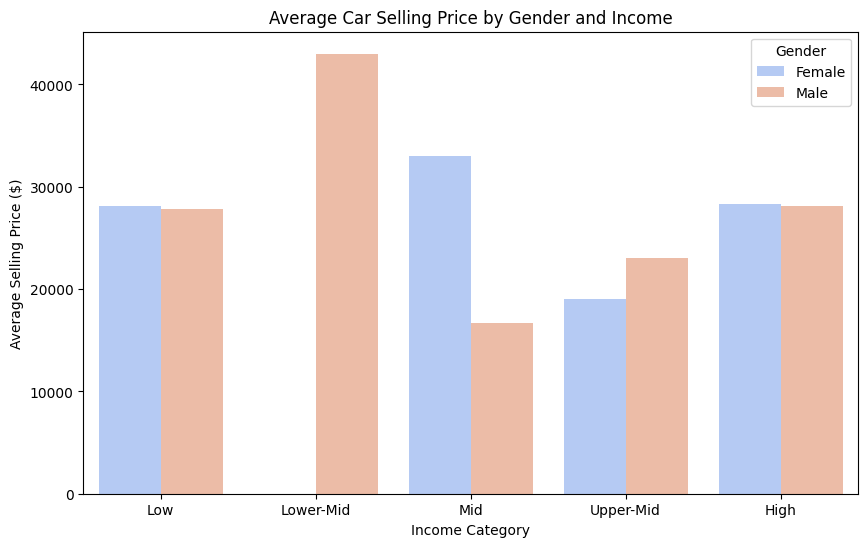

In [37]:
# 6.  How does the average selling price of cars vary by customer gender and annual income?


df = pd.DataFrame(data)

income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"]
df["Income_Category"] = pd.cut(df["Annual Income"], bins=income_bins, labels=income_labels)

avg_price = df.groupby(["Gender", "Income_Category"])["Price ($)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x="Income_Category", y="Price ($)", hue="Gender", palette="coolwarm")
plt.xlabel("Income Category")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Selling Price by Gender and Income")
plt.legend(title="Gender")
plt.show()


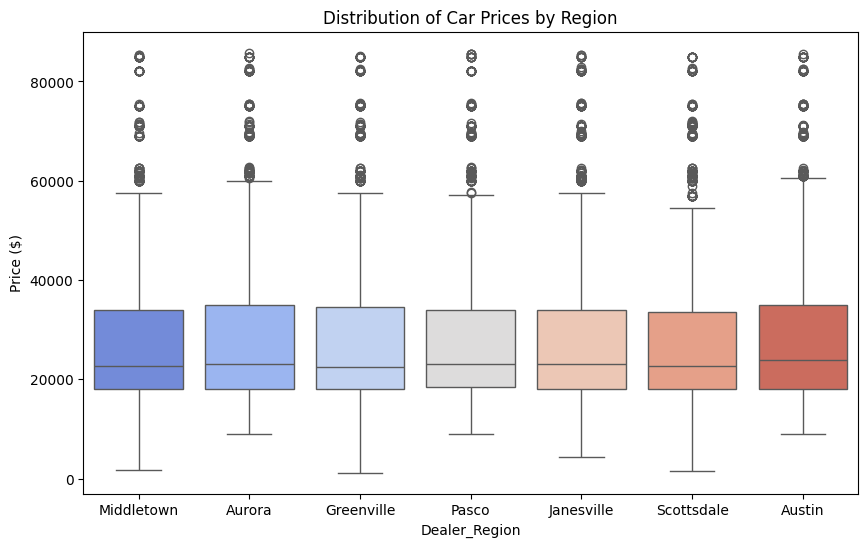

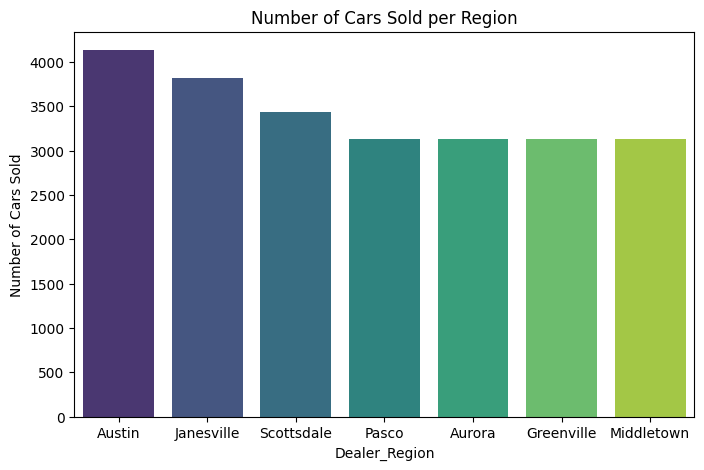

In [38]:
# 7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="coolwarm")
plt.xlabel("Dealer_Region")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices by Region")
plt.show()

car_counts = df["Dealer_Region"].value_counts().reset_index()
car_counts.columns = ["Dealer_Region", "Number of Cars Sold"]

plt.figure(figsize=(8, 5))
sns.barplot(data=car_counts, x="Dealer_Region", y="Number of Cars Sold", palette="viridis")
plt.xlabel("Dealer_Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold per Region")
plt.show()

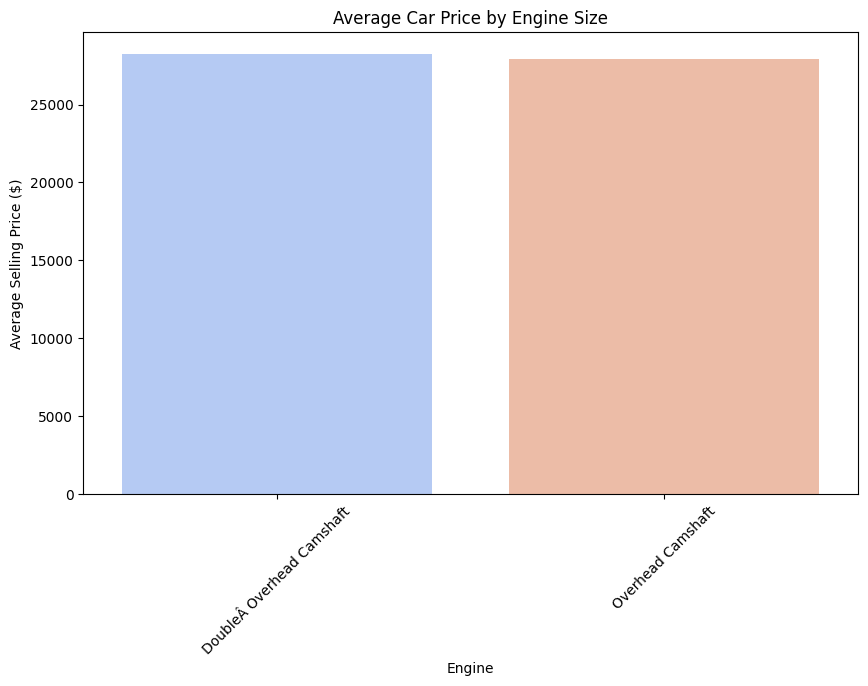

In [39]:
# 8.  How does the average car price differ between cars with different engine sizes?

df = pd.DataFrame(data)

avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_engine, x="Engine", y="Price ($)", palette="coolwarm")
plt.xlabel("Engine")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Engine Size")
plt.xticks(rotation=45)
plt.show()


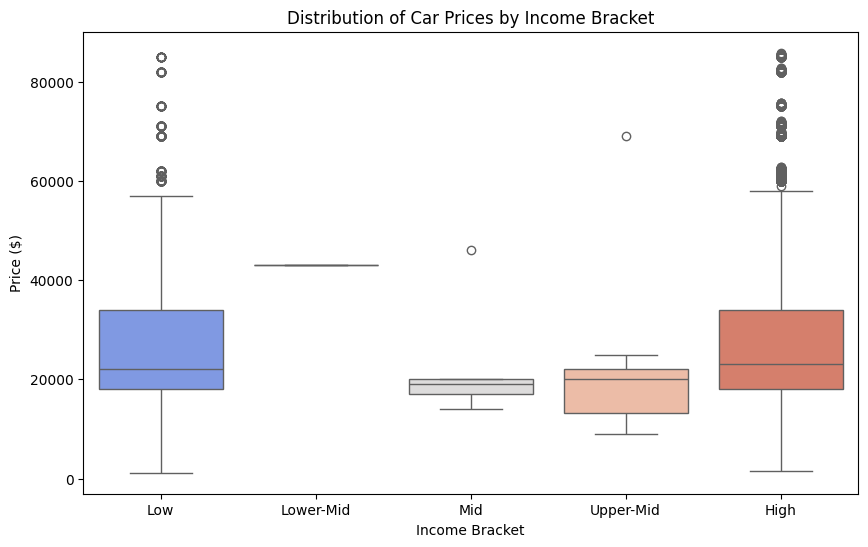

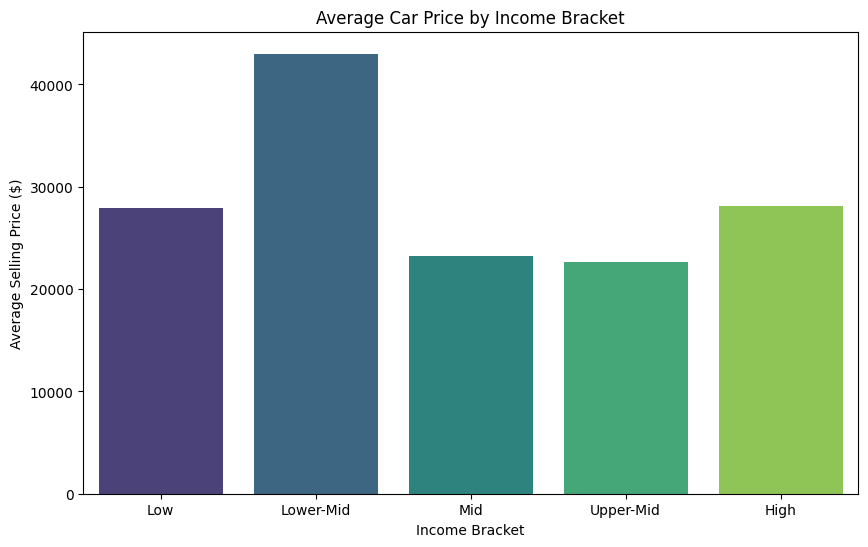

In [40]:
# 9. How do car prices vary based on the customer’s annual income bracket?

df = pd.DataFrame(data)

income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"]
df["Income_Bracket"] = pd.cut(df["Annual Income"], bins=income_bins, labels=income_labels)

avg_price_by_income = df.groupby("Income_Bracket")["Price ($)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Income_Bracket", y="Price ($)", palette="coolwarm")
plt.xlabel("Income Bracket")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices by Income Bracket")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_income, x="Income_Bracket", y="Price ($)", palette="viridis")
plt.xlabel("Income Bracket")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Income Bracket")
plt.show()


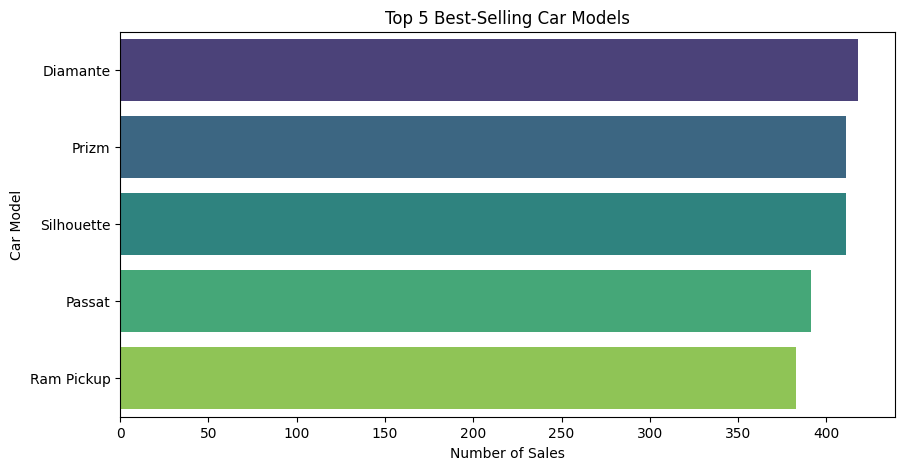

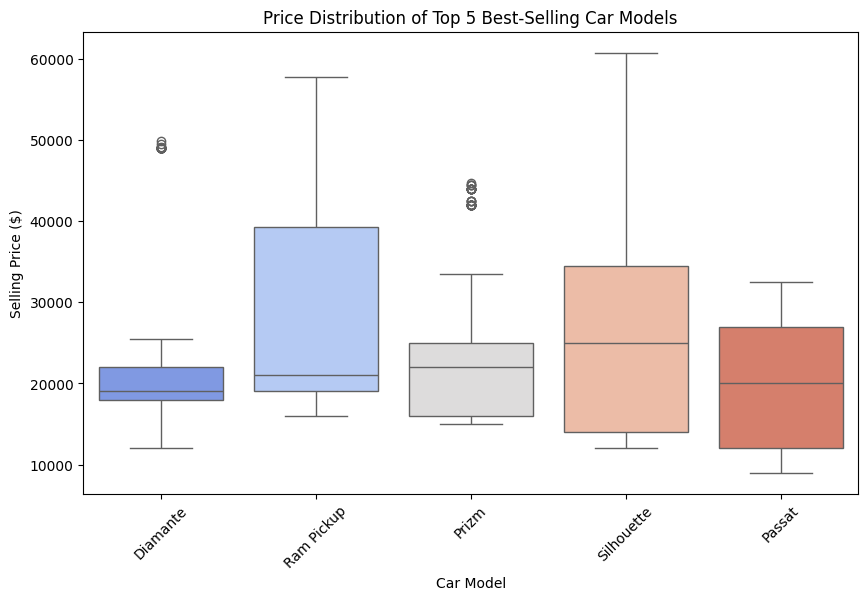

In [41]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

df = pd.DataFrame(data)
top_models = df["Model"].value_counts().head(5).index

df_top_models = df[df["Model"].isin(top_models)]

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top_models, y="Model", order=top_models, palette="viridis")
plt.xlabel("Number of Sales")
plt.ylabel("Car Model")
plt.title("Top 5 Best-Selling Car Models")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_models, x="Model", y="Price ($)", palette="coolwarm")
plt.xlabel("Car Model")
plt.ylabel("Selling Price ($)")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xticks(rotation=45)
plt.show()


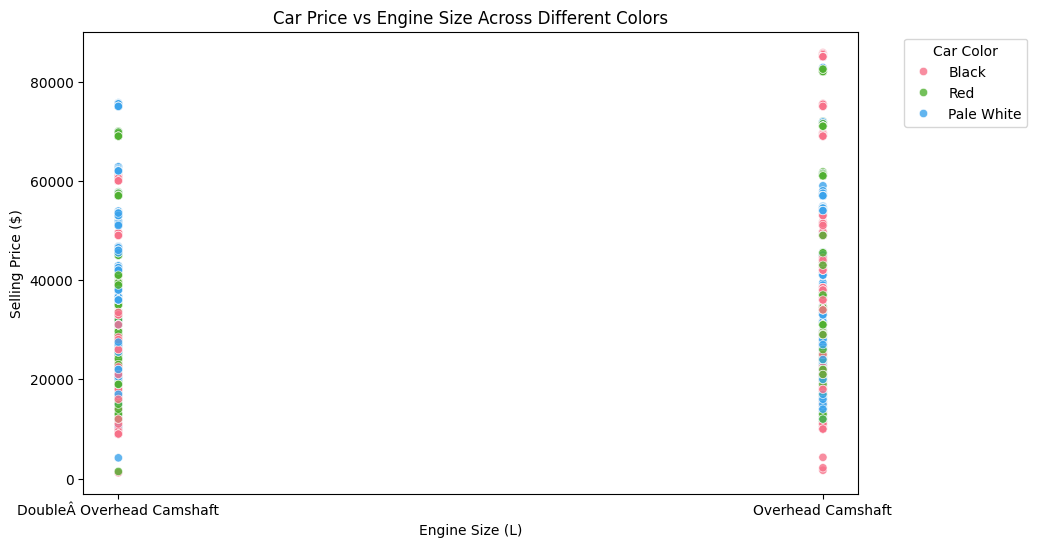

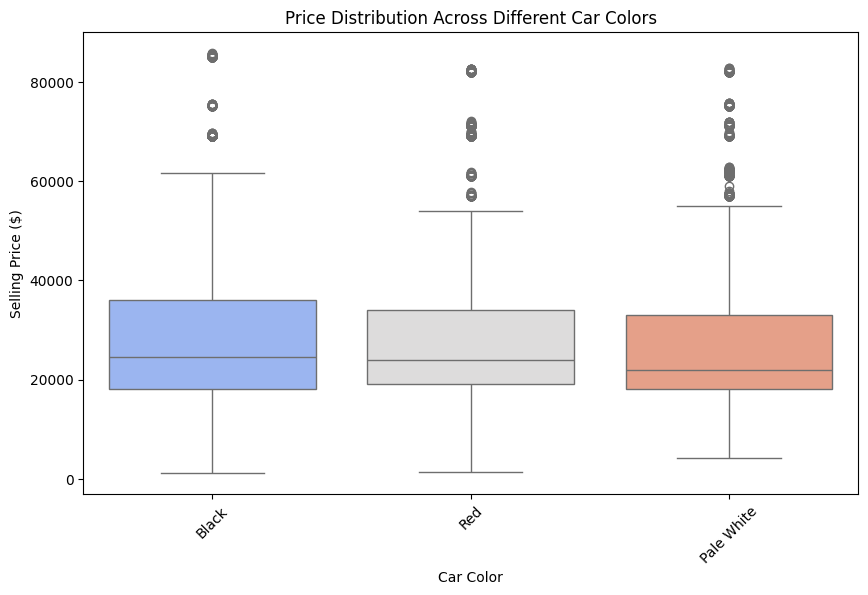

Car color with the highest price variation: Red with a standard deviation of $15519.36


In [42]:
# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Engine", y="Price ($)", hue="Color", palette="husl", alpha=0.8)
plt.xlabel("Engine Size (L)")
plt.ylabel("Selling Price ($)")
plt.title("Car Price vs Engine Size Across Different Colors")
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Color", y="Price ($)", palette="coolwarm")
plt.xlabel("Car Color")
plt.ylabel("Selling Price ($)")
plt.title("Price Distribution Across Different Car Colors")
plt.xticks(rotation=45)
plt.show()

price_variation = df.groupby("Color")["Price ($)"].std().reset_index()
highest_variation_color = price_variation.sort_values(by="Price ($)", ascending=False).iloc[0]

print(f"Car color with the highest price variation: {highest_variation_color['Color']} "
      f"with a standard deviation of ${highest_variation_color['Price ($)']:.2f}")


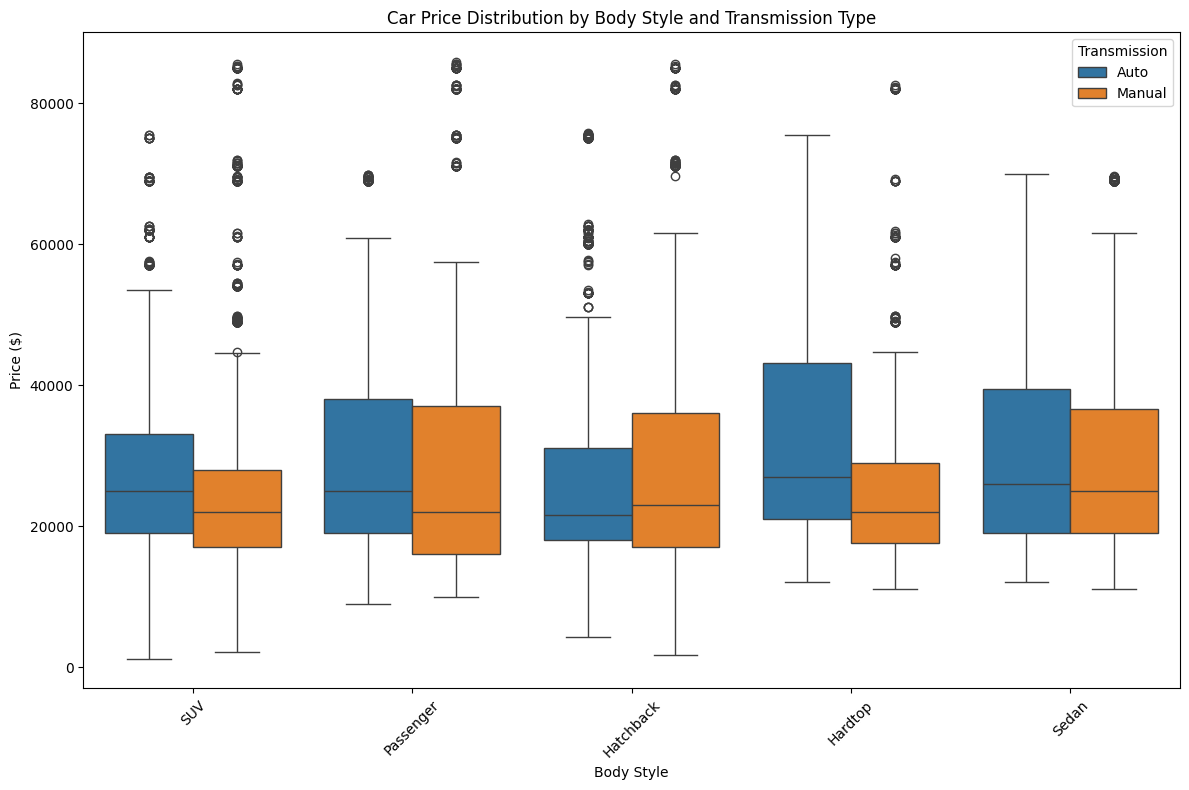

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

In [43]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?

df = df.dropna(subset=['Price ($)', 'Body Style', 'Transmission'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

grouped_stats = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print(grouped_stats)


In [ ]:
# EDA - 3

In [44]:
df = pd.read_csv('/content/amazon.csv')

In [46]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [47]:
# 1.  What is the average rating for each product category?

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

average_ratings = df.groupby("category")["rating"].mean().reset_index()

average_ratings


,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [49]:
# 2.  What are the top rating_count products by category?

df["rating_count"] = df["rating_count"].str.replace(",", "").astype(float)

top_products = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]

top_products


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426.0
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222.0
748,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969.0
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352.0
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792.0
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199.0
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,5719.0
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308.0


In [50]:
# 3.  What is the distribution of discounted prices vs. actual prices?

df["discounted_price"] = df["discounted_price"].str.replace("[₹,]", "", regex=True).astype(float)
df["actual_price"] = df["actual_price"].str.replace("[₹,]", "", regex=True).astype(float)

price_summary = df[["discounted_price", "actual_price"]].describe()

price_summary


,discounted_price,actual_price
count,1465.000000,1465.000000
mean,3125.310874,5444.990635
std,6944.304394,10874.826864
min,39.000000,39.000000
25%,325.000000,800.000000
50%,799.000000,1650.000000
75%,1999.000000,4295.000000
max,77990.000000,139900.000000


In [51]:
# 4.  How does the average discount percentage vary across categories?

df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

average_discount = df.groupby("category")["discount_percentage"].mean().reset_index()

average_discount


,category,discount_percentage
0,Car&Motorbike|CarAccessories|InteriorAccessori...,42.0
1,Computers&Accessories|Accessories&Peripherals|...,78.5
2,Computers&Accessories|Accessories&Peripherals|...,35.0
3,Computers&Accessories|Accessories&Peripherals|...,56.5
4,Computers&Accessories|Accessories&Peripherals|...,46.5
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,5.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,17.5
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,13.0


In [52]:
# 5. What are the most popular product names?

popular_products = df[["product_name", "rating_count"]].sort_values(by="rating_count", ascending=False).head(10)

popular_products


,product_name,rating_count
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0


In [53]:
# 6. What are the most popular product keywords?

from collections import Counter
import re

all_words = " ".join(df["product_name"]).lower()
words = re.findall(r'\b\w+\b', all_words)
word_counts = Counter(words)

popular_keywords = word_counts.most_common(20)

popular_keywords



[('with', 752),
 ('for', 674),
 ('black', 530),
 ('usb', 417),
 ('cable', 414),
 ('1', 413),
 ('and', 331),
 ('c', 289),
 ('3', 275),
 ('2', 267),
 ('charging', 247),
 ('type', 243),
 ('to', 219),
 ('fast', 212),
 ('in', 178),
 ('smart', 175),
 ('white', 170),
 ('tv', 152),
 ('compatible', 146),
 ('5', 137)]

In [54]:
# 7. What are the most popular product reviews?


df["rating_count"] = df["rating_count"].astype(str).str.replace(",", "", regex=True)

df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

popular_reviews = df[["review_content", "rating_count"]].dropna().sort_values(by="rating_count", ascending=False)
print(popular_reviews.head(10))


                                        review_content  rating_count
47   I am using it for 14 days now. The experience ...      426973.0
65   I am using it for 14 days now. The experience ...      426973.0
12   I am using it for 14 days now. The experience ...      426973.0
684  I am using it for 14 days now. The experience ...      426972.0
400  The sound quality of this earphone are really ...      363713.0
352  The sound quality of this earphone are really ...      363713.0
584  The sound quality of this earphone are really ...      363711.0
371  If you want a smart phone for just the use of ...      313836.0
370  If you want a smart phone for just the use of ...      313836.0
566  If you want a smart phone for just the use of ...      313832.0


In [55]:
# 8.  What is the correlation between discounted_price and rating?

df["discounted_price"] = df["discounted_price"].astype(str).str.replace("[₹,]", "", regex=True).astype(float)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")


correlation = df["discounted_price"].corr(df["rating"])

print(f"Correlation between discounted price and rating: {correlation}")

Correlation between discounted price and rating: 0.12033741712288548


In [56]:
# 9.  What are the Top 5 categories based on the highest ratings?

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['main_category'] = df['category'].str.split('|').str[0]

category_ratings = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)

top_5_categories = category_ratings.head(5)
top_5_categories


,rating
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749


In [57]:
# 10.Identify any potential areas for improvement or optimization based on the data analysis?

category_counts = df['main_category'].value_counts()


category_summary = pd.DataFrame({
    'average_rating': df.groupby('main_category')['rating'].mean(),
    'product_count': category_counts
}).sort_values(by='average_rating', ascending=False)

category_summary


,average_rating,product_count
main_category,,
OfficeProducts,4.309677,31
Toys&Games,4.300000,1
HomeImprovement,4.250000,2
Computers&Accessories,4.154967,453
Electronics,4.081749,526
Home&Kitchen,4.040716,448
Health&PersonalCare,4.000000,1
MusicalInstruments,3.900000,2
Car&Motorbike,3.800000,1


In [ ]:
# EDA - 4

In [58]:
#1. Read the dataframe, check null value if present then do the needful,
# check duplicate row , if present then do the needful.

df = pd.read_csv('/content/spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


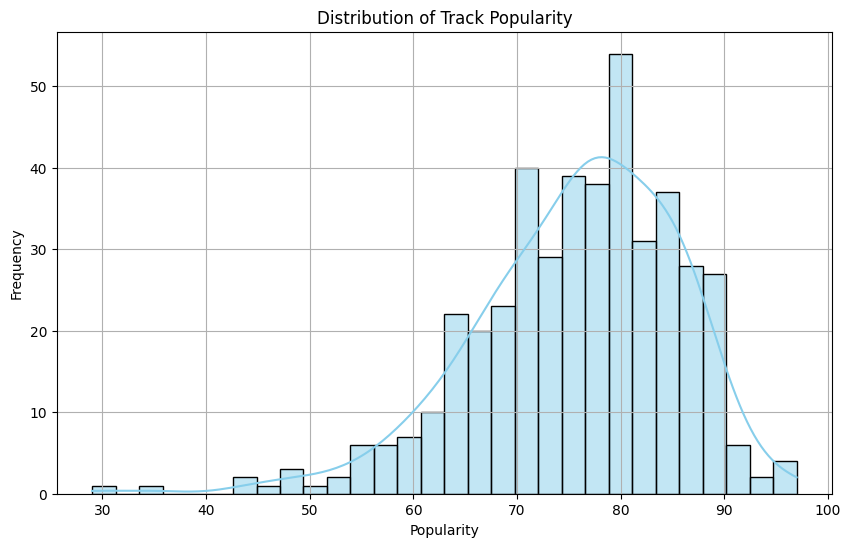

In [59]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

df = df.dropna(subset=['Popularity'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


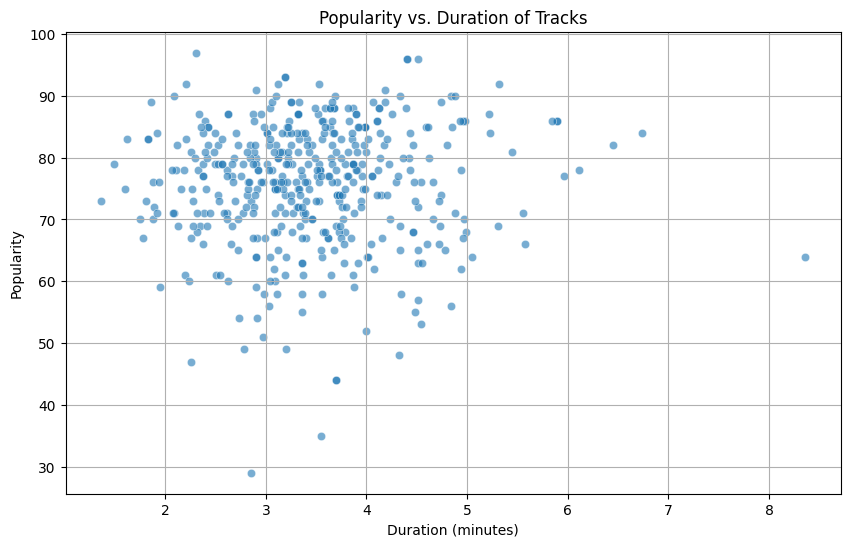

In [60]:
# 3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

df = df.dropna(subset=['Popularity', 'Duration (ms)'])

df['duration_min'] = df['Duration (ms)'] / 60000

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='Popularity', alpha=0.6)
plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


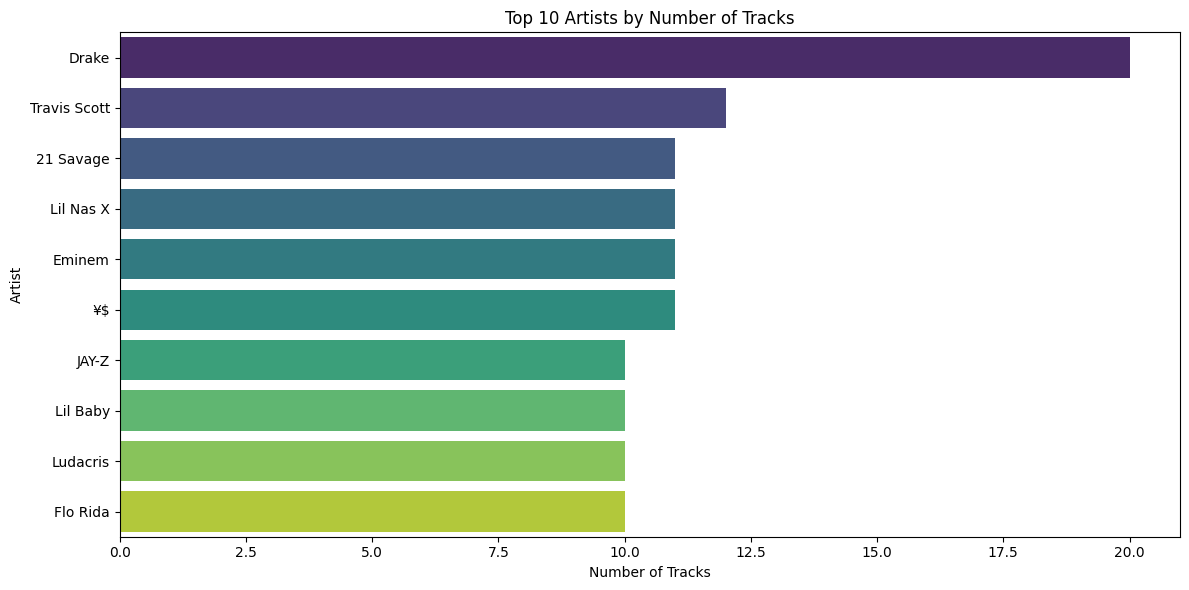

In [61]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
import warnings
warnings.filterwarnings('ignore')

df = df.dropna(subset=['Artist'])

top_artists = df['Artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [62]:
# 5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

df = df.dropna(subset=['Popularity', 'Track Name', 'Artist'])

least_popular = df.sort_values(by='Popularity', ascending=True).head(5)

print(least_popular[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [63]:
# 6. Among the top 5 most popular artists, which artist has the highest
# popularity on average? Calculate and display the average popularity for each artist.

df = df.dropna(subset=['Artist', 'Popularity'])

top_5_artists = df['Artist'].value_counts().head(5).index

top_artists_df = df[df['Artist'].isin(top_5_artists)]

avg_popularity = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print(avg_popularity)


Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64


In [64]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

df = df.dropna(subset=['Artist', 'Track Name', 'Popularity'])

top_5_artists = df['Artist'].value_counts().head(5).index

top_artists_df = df[df['Artist'].isin(top_5_artists)]

most_popular_tracks = top_artists_df.loc[top_artists_df.groupby('Artist')['Popularity'].idxmax()]

result = most_popular_tracks[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=False)
print(result)


           Artist                               Track Name  Popularity
70      21 Savage                                   redrum          96
30   Travis Scott               FE!N (feat. Playboi Carti)          93
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80         Eminem                               Without Me          90
312     Lil Nas X                        THATS WHAT I WANT          81


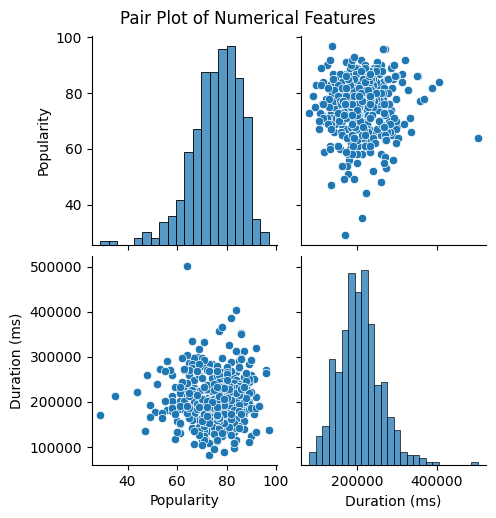

In [65]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

num_cols = ['Popularity', 'Duration (ms)']
df_cleaned = df[num_cols].dropna()

sns.pairplot(df_cleaned)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


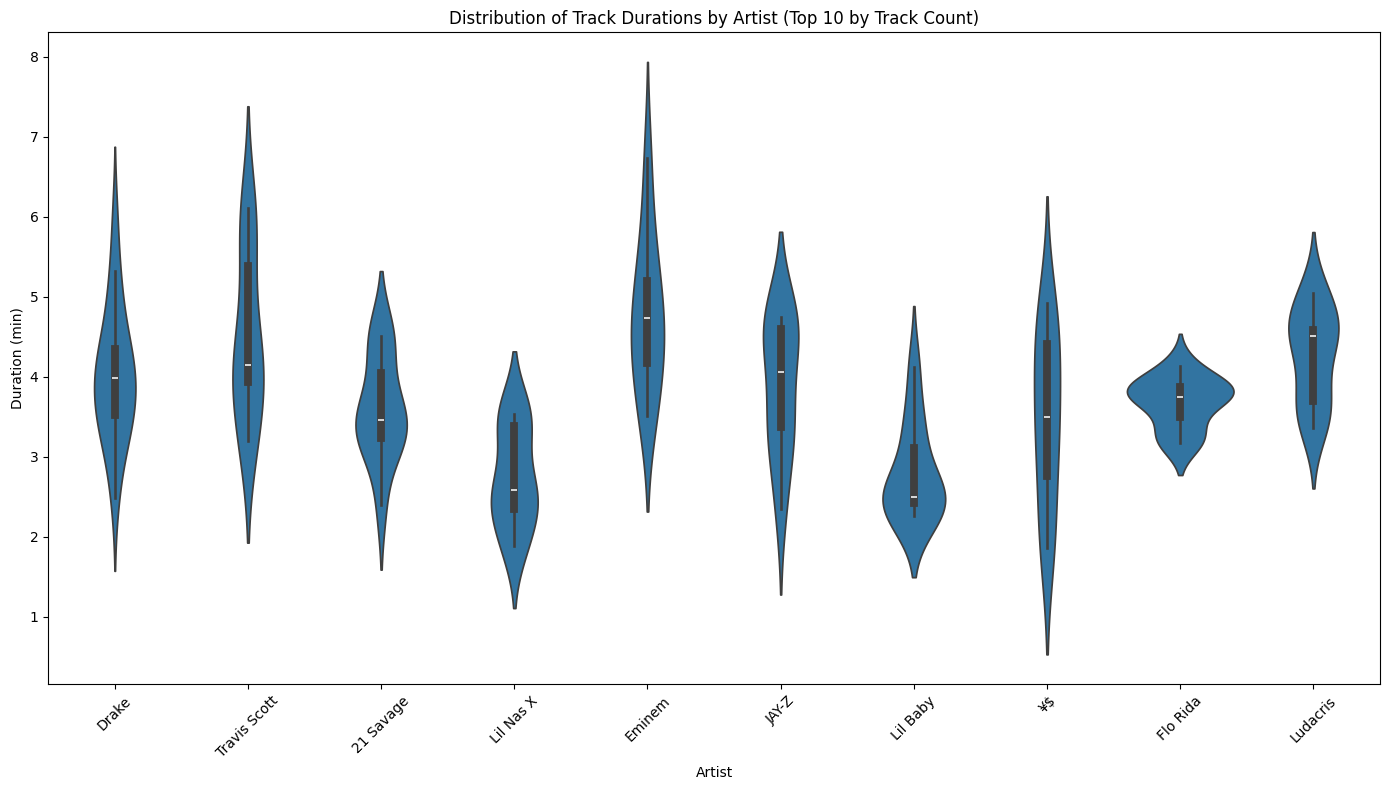

In [66]:
# 9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

df['Duration (min)'] = df['Duration (ms)'] / 60000

top_artists = df['Artist'].value_counts().nlargest(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Duration (min)', data=filtered_df, inner='box')
plt.title('Distribution of Track Durations by Artist (Top 10 by Track Count)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


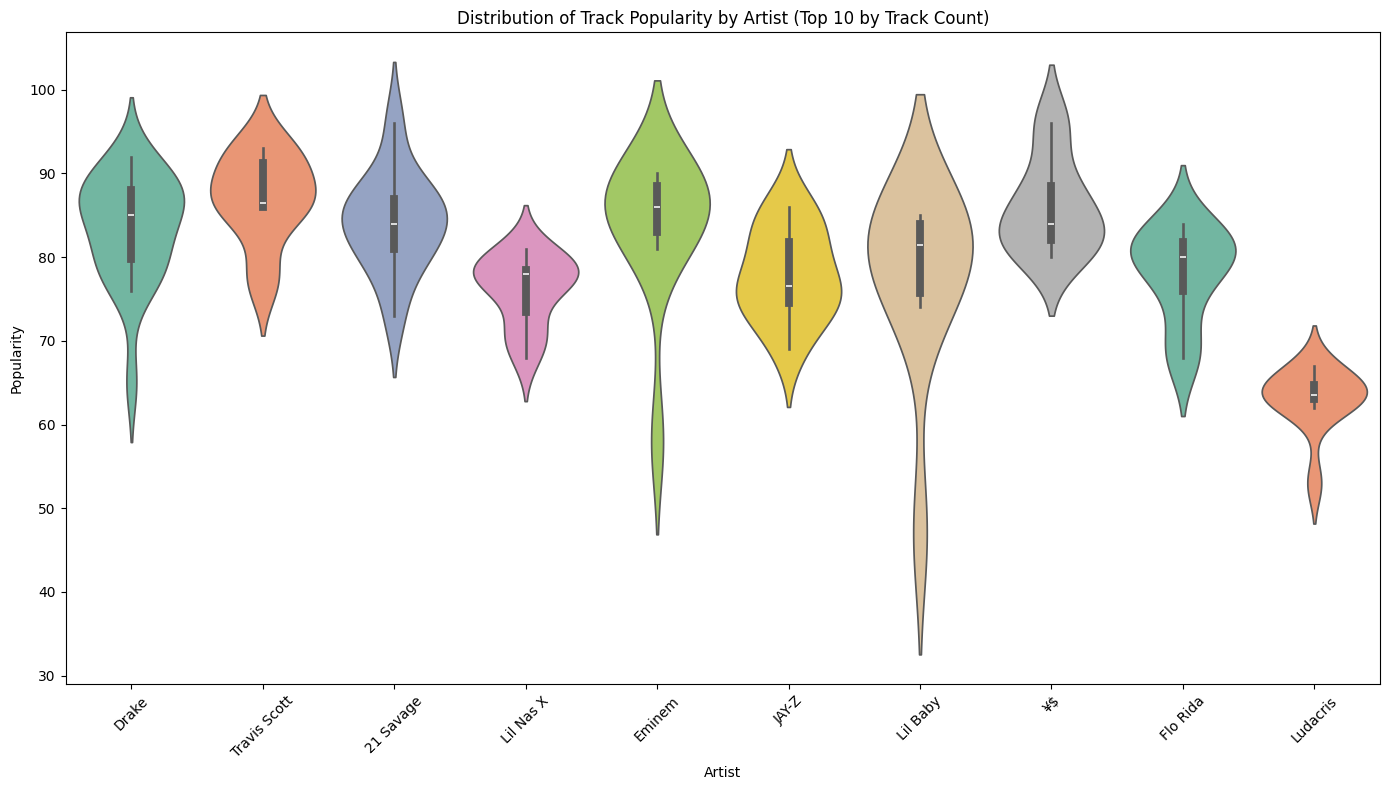

In [67]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Popularity', data=filtered_df, inner='box', palette="Set2")
plt.title('Distribution of Track Popularity by Artist (Top 10 by Track Count)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
